In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import os

In [2]:
"""
1. Gather insights about the annotators:
    a. How many annotators did contribute to the dataset?
    b. What are the average, min and max annotation times (durations)? Feel free to
        add visual representations here such as graphs if you like.
    c. Did all annotators produce the same amount of results, or are there
        differences?
    d. Are there questions for which annotators highly disagree?
"""

'\n1. Gather insights about the annotators:\n    a. How many annotators did contribute to the dataset?\n    b. What are the average, min and max annotation times (durations)? Feel free to\n        add visual representations here such as graphs if you like.\n    c. Did all annotators produce the same amount of results, or are there\n        differences?\n    d. Are there questions for which annotators highly disagree?\n'

In [27]:
# The answer of the question: How many annotators did contribute to the dataset?

# Read the results CSV file to analyze the 'vendor_user_id' column
results_data = pd.read_csv('results.csv')
# Extract the 'vendor_user_id' column
vendor_user_id = results_data['vendor_user_id'].tolist()
# Determine the annotator list without repetition
annotators_list_without_repetition=sorted(set(vendor_user_id))
# determine the count of annotator from getting the length of the annotators list without repetition
annotators_count = len(annotators_list_without_repetition)
# print the annotators count
print("The anonymized_project dataset has "+ str(annotators_count) + " annotators")
print(annotators_list_without_repetition[1])

The anonymized_project dataset has 22 annotators
annotator_02


In [4]:
#The answer of the question: What are the average, min and max annotation times (durations)? Feel free to
#add visual representations here such as graphs if you like.

# Extract the 'duration_ms' column
duration_ms = results_data['duration_ms'].tolist()
# Determine the positive time list as time can not be negative number
duration_ms_positive=[i for i in duration_ms if i > 0]
# Determine the average annotation time
average_annotation_time = sum(duration_ms_positive)/len(duration_ms_positive)
# Determine the max annotation time
max_annotation_time = max(duration_ms_positive)
# Determine the min annotation time
min_annotation_time = min(duration_ms_positive)
# print the average annotation time
print("The average annotation time is " + str(average_annotation_time))
# print the max annotation time
print("The max annotation time is " + str(max_annotation_time))
# print the min annotation time
print("The min annotation time is " + str(min_annotation_time))




The average annotation time is 1289.921354992076
The max annotation time is 42398
The min annotation time is 10


The annotators contribution list: [1280, 7596, 630, 6421, 3475, 5337, 2175, 6537, 4860, 315, 6436, 6210, 7078, 1725, 6088, 5061, 3485, 5170, 170, 6126, 2950, 1745]
As shown in the annotators contribution list, the annotators participate with a different amount of results


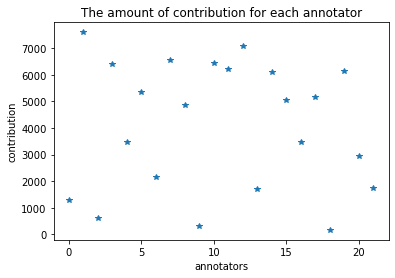

In [31]:
#The answer of the question: Did all annotators produce the same amount of results, or are there
# differences?
def annotator_count(vendor_user_id):
    annotator_contribution_list=[vendor_user_id.count(str(annotatorID)) for annotatorID in annotators_list_without_repetition]
    return annotator_contribution_list
annotator_contribution_list = annotator_count(vendor_user_id)
print('The annotators contribution list: ' + str(annotator_contribution_list))
print('As shown in the annotators contribution list, the annotators participate with a different amount of results')
plt.plot(annotator_contribution_list,'*')
plt.title('The amount of contribution for each annotator')
plt.ylabel('contribution')
plt.xlabel('annotators')
plt.savefig('annotator_contribution.png')
plt.show()

In [33]:
#The answer of the question: Are there questions for which annotators highly disagree?
# Determine the ID of each question in the dataset from the 'anonymized_project.json' file 
DataSet = [json.loads(line) for line in open('anonymized_project.json', 'r', encoding = 'utf-8')]
results=DataSet[0]['results']['root_node']
NodeInputID_List = []
for NodeInputID in results['results']:
    try: 
            NodeInputID_temp = NodeInputID
            NodeInputID_List.append(NodeInputID_temp)
                
    except:
         pass
results=DataSet[0]['results']['root_node']['results'][NodeInputID_List[0]]['results']
#Determine the number of input nodes in the dataset
InputNodesLenght=len(NodeInputID_List)
# Determine the number of questions in each input node
InputNodeQuestions=len(results)

# Extract the 'answer' column
answer = results_data['answer'].tolist()
answer_array = np.array(answer)
shape = ( InputNodesLenght, InputNodeQuestions )
# Shape the annotator's answers list into a matrix 
# to organize the answers of each question in a separate row
answer_matrix=answer_array.reshape( shape )
similar=[]
no_count=0
yes_count=0
# Scan each row in the matrix to get the amount of similarity in each question answer
for rows in range(0, answer_matrix.shape[0]):
    for columns in range(0, answer_matrix.shape[1]):
        if answer_matrix[rows][columns] =='yes':
            yes_count=yes_count+1
        elif answer_matrix[rows][columns] =='no':
            no_count=no_count+1
    number_of_similarities=max([yes_count,no_count])
    temp= number_of_similarities/InputNodeQuestions
    similar.append(temp)
    no_count=0
    yes_count=0

# Use the questions ID list to determine the questions for which annotators highly disagree
# by using the indices of the questions which have similar answers with only 50%  
questions_highly_disagree=[]
for index, item in enumerate(similar):
    if item == 0.5:
        temp=NodeInputID_List[index]
        questions_highly_disagree.append(temp)

questions_highly_disagree_df = pd.DataFrame(columns=['QuestionsHighlyDisagreeID'])
questions_highly_disagree_df.QuestionsHighlyDisagreeID=questions_highly_disagree
print("There are "+ str(len(questions_highly_disagree))+ " questions for which annotators highly disagree which are:")
print(questions_highly_disagree)
# Save the determined questions ID in CSV file
questions_highly_disagree_df.to_csv('questions_highly_disagree.csv') 


10
There are 68 questions for which annotators highly disagree which are:
['e6700252-2540-4503-b601-9ea77c5824c3', '43398efe-2fd3-4426-a7b1-6c2394235c2b', '29f0ef89-165a-4cb6-b85e-2e29a3ea63fa', '44aa9339-fb33-4567-9d48-9426ee45eec6', '46629c2d-0dce-4f4c-908b-e4f86e7c204f', '2ea37264-ba5f-4179-9424-769ba320d0ad', '3d824a87-cb04-4836-8d01-39edbf20542f', '440a7bc1-16ab-4088-8516-d137d7118c91', 'b9b2e178-9ff6-463e-a8e2-08c634b84ba4', 'f7dd3e85-7dbb-4ad4-83d4-4103880828f7', 'e08b26f7-8cd6-4e5f-acd2-668f6647e2f5', 'af60e04d-3a94-4d68-a03b-69912094ea74', '1a026fbd-b23d-4e99-a39f-efd7cee9ad9b', '5837adca-d080-4a36-970f-beea52d4f189', '398b92bd-c368-41be-85fc-67b057f4e680', '1c1f637a-2ce7-48e4-a1e7-31d17bb96d89', '935d994f-4ca8-4d6e-af01-faeeb86f24d3', '552b3443-e420-4c0f-b0bd-4836b587de1c', '994db647-6a9f-426a-bfa8-03630e947538', 'ca84eeb6-6a68-4d6f-a19f-a8000746aa0d', 'd6e15560-0165-47c3-8e79-ff026f19c110', '601715be-001a-44f8-a608-497834e4d596', 'd8cd6d52-fb0c-4bdb-9729-d771de8245b2', '8d8b

In [ ]:
"""
2. Besides picking yes or no the annotators had the chance to tell if the data were
corrupted or if they for any reason were not able to solve the task. These are fields
'cant_solve' and 'corrupt_data' given in the task_output.
    a. How often does each occur in the project and do you see a trend within the
        annotators that made use of these options?
"""

In [7]:
# Extract the 'cant_solve' column
cant_solve = results_data['cant_solve'].tolist()
# Extract the 'corrupt_data' column
corrupt_data = results_data['corrupt_data'].tolist()
cant_solve_count=0
cant_solve_annotator_index=[]
# Calculate how often annotators answer with true for the 'cant_solve' field
for index,answer in enumerate(cant_solve):
    if str(answer) == 'True':
        cant_solve_count=cant_solve_count+1
        cant_solve_annotator_index.append(index)
corrupt_data_count=0
# Calculate how often annotators answer with true for the 'corrupt_data' field
corrupt_data_annotator_index=[]
for index,answer in enumerate(corrupt_data):
    if str(answer) == 'True':
        corrupt_data_count=corrupt_data_count+1
        corrupt_data_annotator_index.append(index)
# Determine the ID of annotators which used cant_solve field
cant_solve_annotators = [vendor_user_id[x] for x in cant_solve_annotator_index]
# Determine the ID of annotators which used corrupt_data field
corrupt_data_annotators = [vendor_user_id[x] for x in corrupt_data_annotator_index]
AmountOfUsageByAnnotators=annotator_count(cant_solve_annotators+corrupt_data_annotators)
CheckForTrend=[index+1 for index,x in enumerate(AmountOfUsageByAnnotators) if x>=3]
print("The 'cant_solve' and 'corrupt_data' fields occurred {0}, {1} times respectively".format(cant_solve_count, corrupt_data_count))
print('IDs of annotators that used cant_solve and corrupt_data fields more than or equal three times:'+str(sorted(CheckForTrend))+'\n')
print('Most likely there is a trend between those annotators to use cant_solve and corrupt_data fields'+'\n')


The 'cant_solve' and 'corrupt_data' fields occurred 17, 4 times respectively
IDs of annotators that used cant_solve and corrupt_data fields more than or equal three times:[4, 8, 18, 22]

Most likely there is a trend between those annotators to use cant_solve and corrupt_data fields



In [ ]:
"""
3. Is the reference set balanced? Please demonstrate via numbers and visualizations.
"""

In [8]:


def plot_emotion_dist(dist, color_code='#C2185B', title="Plot"):
    
    tmp_df = pd.DataFrame()
    tmp_df['is_bicycle'] = list(dist.keys())
    tmp_df['Count'] = list(dist)
    fig, ax = plt.subplots(figsize=(14, 7))
    ax = sns.barplot(x="is_bicycle", y='Count', color=color_code, data=tmp_df)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    plt.savefig('reference_set_distribution.png')

number of images which answered by True = 4586
number of images which answ ered by False = 4501
The reference dataset is balanced as it has approximately equal number of examples for both True and False answer as shown in the figure.


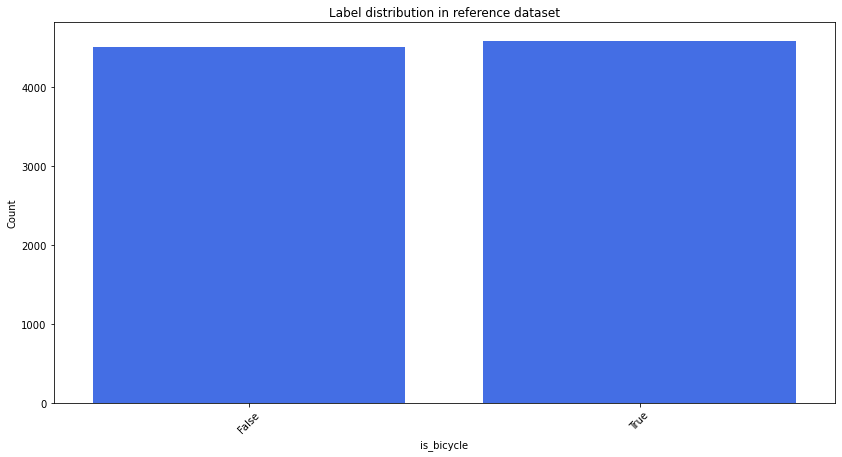

In [9]:
ref_data = pd.read_csv('references_dataset.csv')
Label_distribution = ref_data.Label.value_counts()
print("number of images which answered by True = " +str(Label_distribution[1]))
print("number of images which answ ered by False = " +str(Label_distribution[0]))
print("The reference dataset is balanced as it has approximately equal number of examples for both True and False answer as shown in the figure.")
plot_emotion_dist(Label_distribution, "#2962FF", "Label distribution in reference dataset")



In [ ]:
"""
4. Using the reference set, can you identify good and bad annotators? Please use
statistics and visualizations. Feel free to get creative.
"""

In [10]:

# Read the images labels in the references dataset
Image_Classification =ref_data['Label']
# Replace 'True' with 'yes' and 'False' with 'no' 
# to be convenient for the comparison with the annotators' answers
Image_Classification =Image_Classification.replace( {True: 'yes', False: 'no'})
Image_Classification= np.array(Image_Classification)


In [11]:

# Change the'vendor_user_id' column into numpy array
annotators = np.array(vendor_user_id)
shape = ( InputNodesLenght, InputNodeQuestions )
# Shape the annotator's answers list into a matrix 
# to determine the annotators which participate in each question separately
annotators_matrix =annotators.reshape( shape )

In [12]:
annotator_scores_matrix = np.zeros((answer_matrix.shape[0],answer_matrix.shape[1]))
# Scan the reference dataset and compare the reference answer of each question 
# with the annotarors' answers which participate in the annotation of the same image
# then give a score '1' for the annotator right answer and '0' for the wrong answer
for rows in range(0, answer_matrix.shape[0]):
    for columns in range(0, answer_matrix.shape[1]):
        if answer_matrix[rows][columns] ==Image_Classification[rows]:
            annotator_scores_matrix[rows][columns]=1
        else:
            annotator_scores_matrix[rows][columns]=0


In [13]:
annotator_score_list = np.zeros((22))
# As each annotator contributes to different questions in the dataset,
# the score of each annotator would be calculated by summing his\her 
# score in all contributions. So, the efficiency of each annotator 
# can be determined with the ratio of the annotator score over his\her number of contributions.
for rows in range(0, annotators_matrix.shape[0]):
    for columns in range(0, annotators_matrix.shape[1]):
        if annotators_matrix[rows][columns] == 'annotator_01':
            annotator_score_list[0]=annotator_score_list[0]+annotator_scores_matrix[rows][columns]
        elif annotators_matrix[rows][columns] == 'annotator_02':
            annotator_score_list[1]=annotator_score_list[1]+annotator_scores_matrix[rows][columns]
        elif annotators_matrix[rows][columns] == 'annotator_03':
            annotator_score_list[2]=annotator_score_list[2]+annotator_scores_matrix[rows][columns]
        elif annotators_matrix[rows][columns] == 'annotator_04':
            annotator_score_list[3]=annotator_score_list[3]+annotator_scores_matrix[rows][columns]
        elif annotators_matrix[rows][columns] == 'annotator_05':
            annotator_score_list[4]=annotator_score_list[4]+annotator_scores_matrix[rows][columns]
        elif annotators_matrix[rows][columns] == 'annotator_06':
            annotator_score_list[5]=annotator_score_list[5]+annotator_scores_matrix[rows][columns]
        elif annotators_matrix[rows][columns] == 'annotator_07':
            annotator_score_list[6]=annotator_score_list[6]+annotator_scores_matrix[rows][columns]
        elif annotators_matrix[rows][columns] == 'annotator_08':
            annotator_score_list[7]=annotator_score_list[7]+annotator_scores_matrix[rows][columns]
        elif annotators_matrix[rows][columns] == 'annotator_09':
            annotator_score_list[8]=annotator_score_list[8]+annotator_scores_matrix[rows][columns]
        elif annotators_matrix[rows][columns] == 'annotator_10':
            annotator_score_list[9]=annotator_score_list[9]+annotator_scores_matrix[rows][columns]
        elif annotators_matrix[rows][columns] == 'annotator_11':
            annotator_score_list[10]=annotator_score_list[10]+annotator_scores_matrix[rows][columns]
        elif annotators_matrix[rows][columns] == 'annotator_12':
            annotator_score_list[11]=annotator_score_list[11]+annotator_scores_matrix[rows][columns]
        elif annotators_matrix[rows][columns] == 'annotator_13':
            annotator_score_list[12]=annotator_score_list[12]+annotator_scores_matrix[rows][columns]
        elif annotators_matrix[rows][columns] == 'annotator_14':
            annotator_score_list[13]=annotator_score_list[13]+annotator_scores_matrix[rows][columns]
        elif annotators_matrix[rows][columns] == 'annotator_15':
            annotator_score_list[14]=annotator_score_list[14]+annotator_scores_matrix[rows][columns]
        elif annotators_matrix[rows][columns] == 'annotator_16':
            annotator_score_list[15]=annotator_score_list[15]+annotator_scores_matrix[rows][columns]
        elif annotators_matrix[rows][columns] == 'annotator_17':
            annotator_score_list[16]=annotator_score_list[16]+annotator_scores_matrix[rows][columns]
        elif annotators_matrix[rows][columns] == 'annotator_18':
            annotator_score_list[17]=annotator_score_list[17]+annotator_scores_matrix[rows][columns]
        elif annotators_matrix[rows][columns] == 'annotator_19':
            annotator_score_list[18]=annotator_score_list[18]+annotator_scores_matrix[rows][columns]
        elif annotators_matrix[rows][columns] == 'annotator_20':
            annotator_score_list[19]=annotator_score_list[19]+annotator_scores_matrix[rows][columns]
        elif annotators_matrix[rows][columns] == 'annotator_21':
            annotator_score_list[20]=annotator_score_list[20]+annotator_scores_matrix[rows][columns]
        else:
            annotator_score_list[21]=annotator_score_list[21]+annotator_scores_matrix[rows][columns]
            
 

The annotators' efficiency scores are: [0.9484375  0.93483412 0.92857143 0.92820433 0.93697842 0.9265505
 0.91494253 0.89918923 0.93333333 0.88888889 0.93629584 0.92979066
 0.94687765 0.94666667 0.94842313 0.94230389 0.9420373  0.93636364
 0.94705882 0.94825335 0.94       0.94212034]
Note: Best score = 1 and Worst score = 0


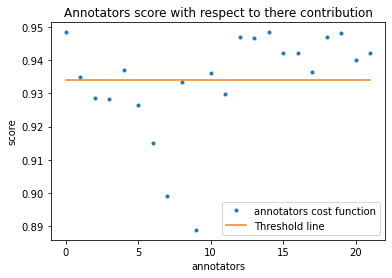

In [14]:

annotator_efficiency = annotator_score_list/annotator_contribution_list
print("The annotators' efficiency scores are: " + str(annotator_efficiency))
print("Note: Best score = 1 and Worst score = 0")
# Determine the threshold through calculating the average of the annotator efficiency
Threshold = sum(annotator_efficiency)/len(annotator_efficiency)
Threshold_line = np.ones(22)*Threshold
plt.plot(annotator_efficiency,'.')
plt.plot(Threshold_line)
plt.title('Annotators score with respect to there contribution')
plt.ylabel('score')
plt.xlabel('annotators')
plt.legend(['annotators cost function', 'Threshold line'], loc='lower right')
plt.savefig('annotators_score_analysis.png')
plt.show()


In [15]:
good_annotator=[]
bad_annotator =[]
# Determine the index of the annotators which have scores above average
for index, efficiency in enumerate(annotator_efficiency):
    if efficiency >= Threshold:
        good_annotator.append(index+1)
    else:
        bad_annotator.append(index+1)

good_annotator_list=['annotator_'+str(s) for s in good_annotator]
bad_annotator_list=['annotator_'+str(s) for s in bad_annotator]
print ("The good annotator list: " + str(good_annotator_list)+"\n")
print("The bad annotator list: "+ str(bad_annotator_list))

The good annotator list: ['annotator_1', 'annotator_2', 'annotator_5', 'annotator_11', 'annotator_13', 'annotator_14', 'annotator_15', 'annotator_16', 'annotator_17', 'annotator_18', 'annotator_19', 'annotator_20', 'annotator_21', 'annotator_22']

The bad annotator list: ['annotator_3', 'annotator_4', 'annotator_6', 'annotator_7', 'annotator_8', 'annotator_9', 'annotator_10', 'annotator_12']
